In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

Our target is the loan_status beause we will see whether they have fully paid the loan or they were carged-off

In [20]:
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [21]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [22]:
df['loan_status']

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object

In [23]:
def converter(y):
    
    if y=='Fully Paid':
        return 1
    else:
        return 0

In [24]:
df['loan_status'] = df['loan_status'].apply(converter)

In [25]:
df['loan_status'].head(6)

0    1
1    1
2    1
3    1
4    0
5    1
Name: loan_status, dtype: int64

We have now our target feature as a binary classification, so we can work with it.

# Now we will explore a little our data set

In [26]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,0.803871,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,0.397068,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,1.000000,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,1.000000,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,1.000000,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,1.000000,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  int64  
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [28]:
#plt.figure(figsize=(12,8))
#sns.heatmap(data=df.isnull())

We observe that some columns have certain values left. What we can do to certify if these columns are key or not for predicting our target is by calling .corr().

Then we have to explore each feature in order to transform them into dummys or not, if they may help to the predcitions.

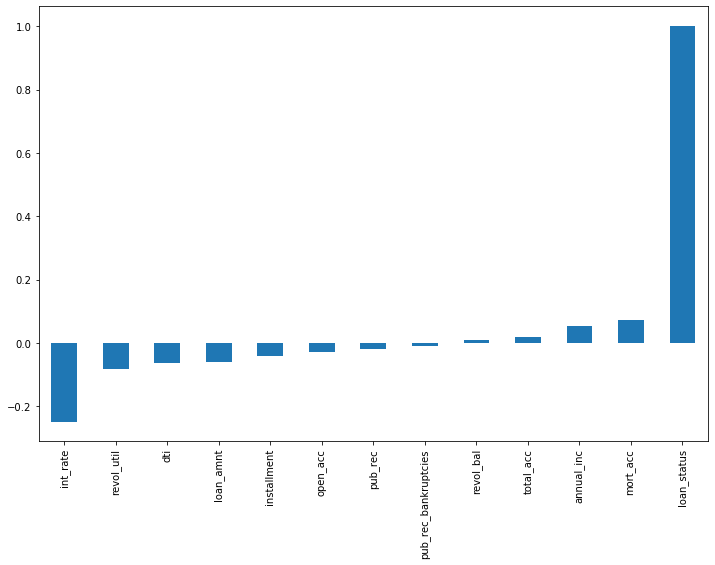

In [29]:
plt.figure(figsize=(12,8))
df.corr()['loan_status'].sort_values().plot(kind='bar')

## feature 'term'

In [30]:
print(data_info.loc['term']['Description'])

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [31]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

we can ake a dummy featur out of 'term'

In [32]:
term_h = pd.get_dummies(df['term'], drop_first=True)

In [33]:
term_h.head()

,60 months
0,0
1,0
2,0
3,0
4,1


In [34]:
df = df.drop(['term'], axis=1)

## feature ' grade'  and 'emp_length'

In [35]:
print(data_info.loc['grade']['Description'])

LC assigned loan grade


In [36]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

df['subgrade'] is realted with df['grade'] and since we cannot turn it into a binary classification unless we set a large number of new columns,we will drop it. We consider that this information is actually in df['grade'].

We will drop ['emp_title'] since its contribution seems unprofitable

In [37]:
df = df.drop(labels=['sub_grade', 'emp_title'], axis=1)

In [38]:
print(data_info.loc['emp_length']['Description'])

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [39]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [40]:
df['emp_length'].isnull().sum()

18301

In [41]:
df['emp_length'].value_counts().sum()

377729

In [42]:
df['emp_length'].isnull().sum()/df['emp_length'].value_counts().sum()

0.04845007928964946

We observe that the missing values in 'emp_length' are less than 5%, so we can forget about them and continue with our work

In [43]:
def converter_emp_length(y):
    
    if y=='10+ years':
        return 'Long term'
    else:
        return 'Short term'

In [44]:
df['emp_length'] = df['emp_length'].apply(converter_emp_length)

In [45]:
df['emp_length']

0          Long term
1         Short term
2         Short term
3         Short term
4         Short term
             ...    
396025    Short term
396026    Short term
396027     Long term
396028     Long term
396029     Long term
Name: emp_length, Length: 396030, dtype: object

In [46]:
emp_length_h = pd.get_dummies(df['emp_length'], drop_first=True)

In [47]:
grade_h = pd.get_dummies(df['grade'])

In [48]:
df = df.drop(['emp_length','grade'], axis=1)

## feature 'verification_status', 'issue_d'

In [49]:
print(data_info.loc['verification_status']['Description'])

Indicates if income was verified by LC, not verified, or if the income source was verified


In [50]:
df['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [51]:
verification_h = pd.get_dummies(df['verification_status'],drop_first=True)

In [52]:
df = df.drop(['verification_status'], axis=1)

In [53]:
print(data_info.loc['issue_d']['Description'])

The month which the loan was funded


In [54]:
df['issue_d'].unique()

array(['Jan-2015', 'Nov-2014', 'Apr-2013', 'Sep-2015', 'Sep-2012',
       'Oct-2014', 'Apr-2012', 'Jun-2013', 'May-2014', 'Dec-2015',
       'Apr-2015', 'Oct-2012', 'Jul-2014', 'Feb-2013', 'Oct-2015',
       'Jan-2014', 'Mar-2016', 'Apr-2014', 'Jun-2011', 'Apr-2010',
       'Jun-2014', 'Oct-2013', 'May-2013', 'Feb-2015', 'Oct-2011',
       'Jun-2015', 'Aug-2013', 'Feb-2014', 'Dec-2011', 'Mar-2013',
       'Jun-2016', 'Mar-2014', 'Nov-2013', 'Dec-2014', 'Apr-2016',
       'Sep-2013', 'May-2016', 'Jul-2015', 'Jul-2013', 'Aug-2014',
       'May-2008', 'Mar-2010', 'Dec-2013', 'Mar-2012', 'Mar-2015',
       'Sep-2011', 'Jul-2012', 'Dec-2012', 'Sep-2014', 'Nov-2012',
       'Nov-2015', 'Jan-2011', 'May-2012', 'Feb-2016', 'Jun-2012',
       'Aug-2012', 'Jan-2016', 'May-2015', 'Oct-2016', 'Aug-2015',
       'Jul-2016', 'May-2009', 'Aug-2016', 'Jan-2012', 'Jan-2013',
       'Nov-2010', 'Jul-2011', 'Mar-2011', 'Feb-2012', 'May-2011',
       'Aug-2010', 'Nov-2016', 'Jul-2010', 'Sep-2010', 'Dec-20

In [55]:
df['issue_d'] = pd.to_datetime(df['issue_d'])

In [56]:
df['issue_d_year'] = df['issue_d'].apply(lambda date : date.year)
df['issue_d_month'] = df['issue_d'].apply(lambda date : date.month)

In [57]:
df = df.drop(['issue_d'], axis=1)

# feature 'home_ownership'

In [58]:
print(data_info.loc['home_ownership']['Description'])

The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER


In [59]:
ownership_h = pd.get_dummies(df['home_ownership'])

In [60]:
df = df.drop(['home_ownership'], axis=1)

## feature 'purpose'

In [61]:
print(data_info.loc['purpose']['Description'])

A category provided by the borrower for the loan request. 


In [62]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [63]:
purpose_h = pd.get_dummies(df['purpose'])

In [64]:
df = df.drop(['purpose'], axis=1)

## feature 'title' and 'earliest_cr_line'

In [65]:
print(data_info.loc['title']['Description'])

The loan title provided by the borrower


In [66]:
print(data_info.loc['earliest_cr_line']['Description'])

The month the borrower's earliest reported credit line was opened


In [67]:
df = df.drop(['title','earliest_cr_line'], axis=1)

## feature 'initial_list_status' and 'application_type'

In [68]:
print(data_info.loc['initial_list_status']['Description'])

The initial listing status of the loan. Possible values are – W, F


In [69]:
initial_list_h = pd.get_dummies(df['initial_list_status'], drop_first=True)

In [70]:
print(data_info.loc['application_type']['Description'])

Indicates whether the loan is an individual application or a joint application with two co-borrowers


In [71]:
application_type_h = pd.get_dummies(df['application_type'], drop_first=True)

In [72]:
df = df.drop(['application_type','initial_list_status'], axis=1)

## feature 'address'

In [73]:
print(data_info.loc['addr_state']['Description'])

The state provided by the borrower in the loan application


In [74]:
print(data_info.loc['earliest_cr_line']['Description'])

The month the borrower's earliest reported credit line was opened


In [75]:
df = df.drop(labels=['address'], axis=1)

In [76]:
df = pd.concat([df,term_h,application_type_h,initial_list_h,purpose_h,ownership_h,
               verification_h,grade_h,emp_length_h], axis=1)

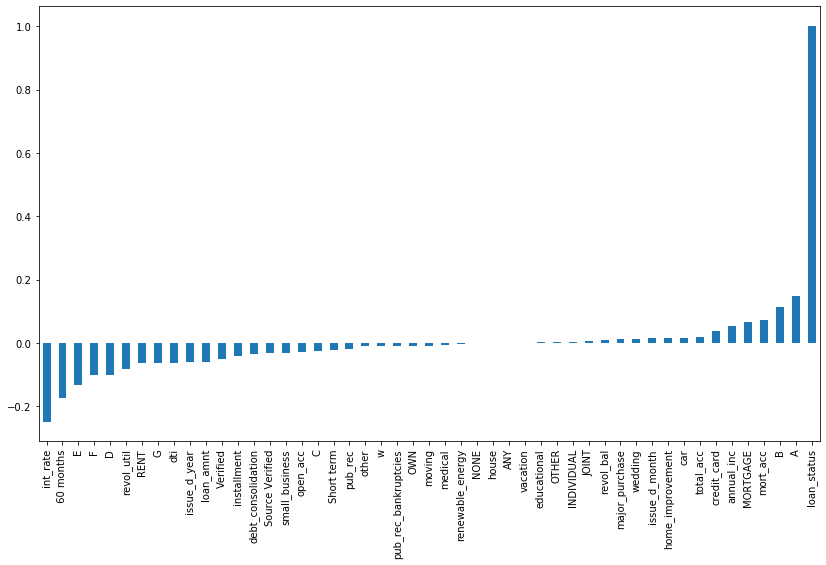

In [77]:
plt.figure(figsize=(14,8))
df.corr()['loan_status'].sort_values().plot(kind='bar')

 Since we observe that there are some features that are slightly correlated with the loan status, we can drop them.
 
 In additon we will drop every column that we have transformed into dummies.

In [78]:
#df = df.drop(['application_type','initial_list_status','title','purpose',
        #      'home_ownership','emp_length','grade','earliest_cr_line',
         #     'verification_status','issue_d'], axis=1)

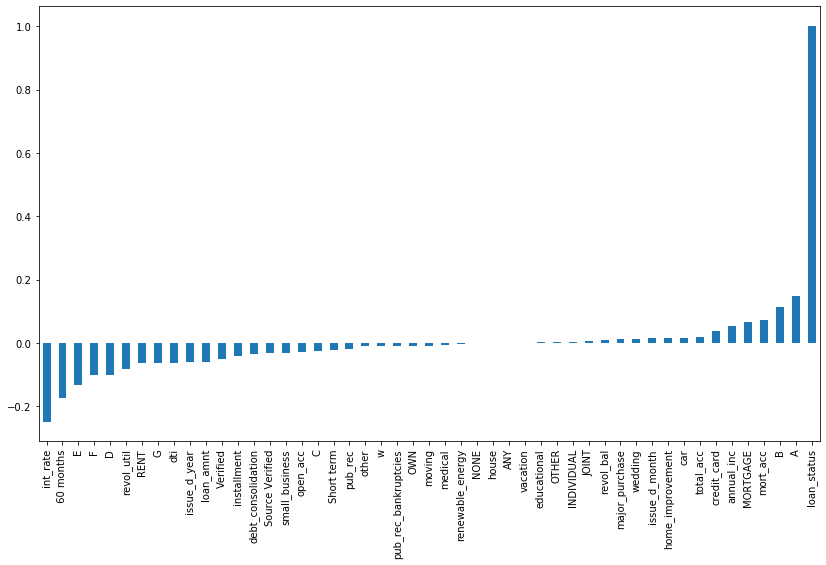

In [79]:
plt.figure(figsize=(14,8))
df.corr()['loan_status'].sort_values().plot(kind='bar')

In [80]:
df_short = df.drop(['other','w','pub_rec_bankruptcies','OWN','moving',
                   'medical','renewable_energy','NONE','house',
                   'ANY','vacation','educational','OTHER',
                   'INDIVIDUAL','JOINT'], axis=1)

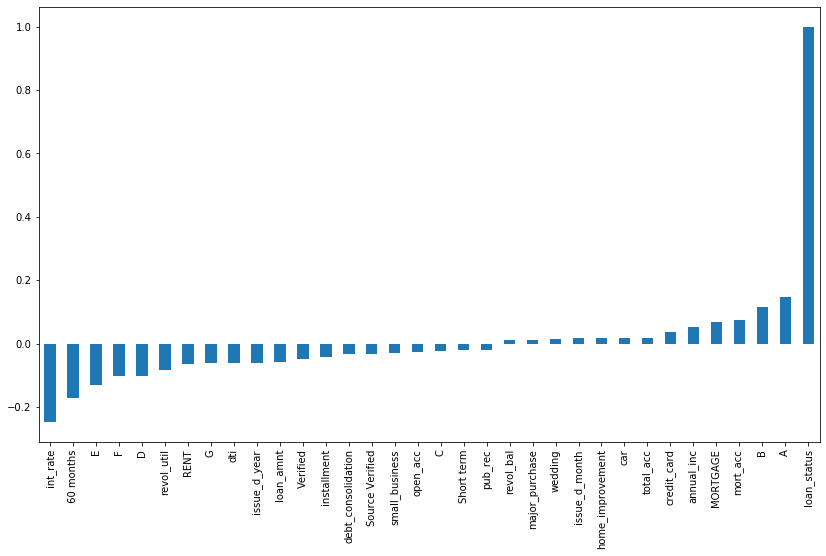

In [81]:
plt.figure(figsize=(14,8))
df_short.corr()['loan_status'].sort_values().plot(kind='bar')

In [82]:
df_short.head(2)

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,...,Source Verified,Verified,A,B,C,D,E,F,G,Short term
0,10000.0,11.44,329.48,117000.0,1,26.24,16.0,0.0,36369.0,41.8,...,0,0,0,1,0,0,0,0,0,0
1,8000.0,11.99,265.68,65000.0,1,22.05,17.0,0.0,20131.0,53.3,...,0,0,0,1,0,0,0,0,0,1


In [83]:
df_short.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status',
       'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'issue_d_year', 'issue_d_month', ' 60 months', 'car',
       'credit_card', 'debt_consolidation', 'home_improvement',
       'major_purchase', 'small_business', 'wedding', 'MORTGAGE', 'RENT',
       'Source Verified', 'Verified', 'A', 'B', 'C', 'D', 'E', 'F', 'G',
       'Short term'],
      dtype='object')

# If there is any NaN value the model won't work
There are 3 features in df that have null values ['pub_rec_bankruptcies','revol_util','mort_acc']

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 49 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   int_rate              396030 non-null  float64
 2   installment           396030 non-null  float64
 3   annual_inc            396030 non-null  float64
 4   loan_status           396030 non-null  int64  
 5   dti                   396030 non-null  float64
 6   open_acc              396030 non-null  float64
 7   pub_rec               396030 non-null  float64
 8   revol_bal             396030 non-null  float64
 9   revol_util            395754 non-null  float64
 10  total_acc             396030 non-null  float64
 11  mort_acc              358235 non-null  float64
 12  pub_rec_bankruptcies  395495 non-null  float64
 13  issue_d_year          396030 non-null  int64  
 14  issue_d_month         396030 non-null  int64  
 15  

Before we build our model we should fix this issue of missing values

## Feature revol_util

In [85]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [86]:
df[['revol_util','int_rate']]

,revol_util,int_rate
0,41.8,11.44
1,53.3,11.99
2,92.2,10.49
3,21.5,6.49
4,69.8,17.27
...,...,...
396025,34.3,10.99
396026,95.7,12.29
396027,66.9,9.99
396028,53.8,15.31


In [87]:
#sns.jointplot(data=df, x= 'revol_util',y='int_rate')

In [88]:
df= df[df['revol_util']<500]

In [89]:
#sns.jointplot(data=df, x= 'revol_util',y='int_rate')

In [90]:
df=df.dropna(axis=0)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358013 entries, 0 to 396028
Data columns (total 49 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             358013 non-null  float64
 1   int_rate              358013 non-null  float64
 2   installment           358013 non-null  float64
 3   annual_inc            358013 non-null  float64
 4   loan_status           358013 non-null  int64  
 5   dti                   358013 non-null  float64
 6   open_acc              358013 non-null  float64
 7   pub_rec               358013 non-null  float64
 8   revol_bal             358013 non-null  float64
 9   revol_util            358013 non-null  float64
 10  total_acc             358013 non-null  float64
 11  mort_acc              358013 non-null  float64
 12  pub_rec_bankruptcies  358013 non-null  float64
 13  issue_d_year          358013 non-null  int64  
 14  issue_d_month         358013 non-null  int64  
 15  

# Now we build our model

We split our data

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X = df.drop('loan_status', axis=1).values
y = df['loan_status'].values

In [94]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=101)

Now we scale our data

In [95]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
scaler = MinMaxScaler()

In [97]:
X_train = scaler.fit_transform(X_train)

In [98]:
X_test = scaler.transform(X_test)

Now we create our model

In [99]:
df.shape

(358013, 49)

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

2024-08-20 15:21:52.276333: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-20 15:21:55.292674: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-20 15:21:55.297965: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-20 15:22:04.033686: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [101]:
model = Sequential()

model.add(Dense(51, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.5))
#For binary classification model de last layer must have a sigmoid function as activation function
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [102]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [103]:
model.fit(x=X_train, y=y_train, epochs=120
         ,validation_data=(X_test, y_test),
         callbacks=[early_stop])#we pass callbacks as a list []

Epoch 1/120
7832/7832 [==============================] - 15s 2ms/step - loss: 0.4778 - val_loss: 0.4639
Epoch 2/120
7832/7832 [==============================] - 13s 2ms/step - loss: 0.4674 - val_loss: 0.4632
Epoch 3/120
7832/7832 [==============================] - 13s 2ms/step - loss: 0.4649 - val_loss: 0.4617
Epoch 4/120
7832/7832 [==============================] - 13s 2ms/step - loss: 0.4635 - val_loss: 0.4613
Epoch 5/120
7832/7832 [==============================] - 13s 2ms/step - loss: 0.4634 - val_loss: 0.4596
Epoch 6/120
7832/7832 [==============================] - 13s 2ms/step - loss: 0.4633 - val_loss: 0.4572
Epoch 7/120
7832/7832 [==============================] - 13s 2ms/step - loss: 0.4623 - val_loss: 0.4576
Epoch 8/120
7832/7832 [==============================] - 13s 2ms/step - loss: 0.4620 - val_loss: 0.4575
Epoch 9/120
7832/7832 [==============================] - 13s 2ms/step - loss: 0.4616 - val_loss: 0.4569
Epoch 10/120
7832/7832 [==============================] - 13s 2m

7832/7832 [==============================] - 13s 2ms/step - loss: 0.4574 - val_loss: 0.4524
Epoch 80/120
7832/7832 [==============================] - 13s 2ms/step - loss: 0.4576 - val_loss: 0.4531
Epoch 81/120
7832/7832 [==============================] - 13s 2ms/step - loss: 0.4576 - val_loss: 0.4533
Epoch 82/120
7832/7832 [==============================] - 13s 2ms/step - loss: 0.4580 - val_loss: 0.4533
Epoch 83/120
7832/7832 [==============================] - 13s 2ms/step - loss: 0.4577 - val_loss: 0.4534
Epoch 84/120
7832/7832 [==============================] - 13s 2ms/step - loss: 0.4577 - val_loss: 0.4518
Epoch 85/120
7832/7832 [==============================] - 13s 2ms/step - loss: 0.4574 - val_loss: 0.4539
Epoch 86/120
7832/7832 [==============================] - 13s 2ms/step - loss: 0.4573 - val_loss: 0.4530
Epoch 87/120
7832/7832 [==============================] - 14s 2ms/step - loss: 0.4580 - val_loss: 0.4520
Epoch 88/120
7832/7832 [==============================] - 13s 2ms/st

In [104]:
losses=pd.DataFrame(model.history.history)

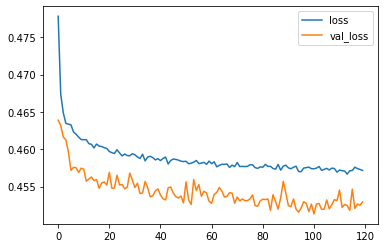

In [105]:
losses.plot()

In [106]:
predictions = model.predict(X_test)

3357/3357 [==============================] - 3s 878us/step


In [107]:
predictions

array([[0.94622296],
       [0.835721  ],
       [0.79469264],
       ...,
       [0.6706408 ],
       [0.9164662 ],
       [0.88935125]], dtype=float32)

In [108]:
predicted_classes = predictions>0.5
predicted_classes = predicted_classes.astype(int)

In [109]:
from sklearn.metrics import confusion_matrix,classification_report

In [110]:
print(classification_report(y_test, predicted_classes))
print(confusion_matrix(y_test,predicted_classes))

              precision    recall  f1-score   support

           0       0.62      0.01      0.02     21706
           1       0.80      1.00      0.89     85698

    accuracy                           0.80    107404
   macro avg       0.71      0.50      0.45    107404
weighted avg       0.76      0.80      0.71    107404

[[  214 21492]
 [  133 85565]]
